# Applied Statistics Final Project
## Ronald Adomako
12/9/19

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.regression.linear_model as sm

import cartopy.crs as ccrs
import geopandas as gpd
import cartopy.io.shapereader as shprdr

%matplotlib inline

In [9]:
column = ["year", "month", "day", "hour", "LAT", "LON", "ISST","OSST",
 "OERR", "SI", "ICflag", "DS", "VS", "WDIR", "WSPD", "SLP",
 "AT", "WBT", "DPT", "CLT", "CLL"]
len(column)

21

In [10]:
DB = pd.read_csv("DB_33944.csv", names = column)
MB = pd.read_csv("MB_62413.csv", names = column)
SH = pd.read_csv("SH_GDLS.csv", names = column)

In [12]:
SH

,year,month,day,hour,LAT,LON,ISST,OSST,OERR,SI,...,DS,VS,WDIR,WSPD,SLP,AT,WBT,DPT,CLT,CLL
0,1991,9,1,0,57.48,340.16,13.4,12.90,0.31,2.0,...,NaN,NaN,265.0,5.9,NaN,12.5,11.2,10.2,NaN,NaN
1,1991,9,1,0,57.50,340.00,13.9,12.89,0.30,3.0,...,8.0,2.0,240.0,2.6,1015.3,12.4,11.0,9.6,8.0,2.0
2,1991,9,1,1,57.38,340.47,13.3,12.93,0.31,2.0,...,NaN,NaN,249.0,5.5,NaN,12.6,11.2,10.1,NaN,NaN
3,1991,9,1,2,57.30,340.79,13.3,12.98,0.31,2.0,...,NaN,NaN,255.0,4.3,NaN,12.5,11.1,10.0,NaN,NaN
4,1991,9,1,3,57.25,341.00,13.3,13.05,0.23,2.0,...,NaN,NaN,275.0,4.7,NaN,12.6,11.2,10.1,NaN,NaN
5,1991,9,1,4,57.24,341.02,13.2,13.07,0.23,2.0,...,NaN,NaN,307.0,5.6,NaN,12.6,11.0,9.7,NaN,NaN
6,1991,9,1,5,57.17,341.35,13.3,13.16,0.24,2.0,...,NaN,NaN,322.0,5.3,NaN,12.3,11.0,10.0,NaN,NaN
7,1991,9,1,6,57.09,341.68,13.1,13.18,0.23,2.0,...,NaN,NaN,318.0,4.0,NaN,12.4,10.7,9.3,NaN,NaN
8,1991,9,1,6,57.10,341.70,13.5,13.19,0.23,3.0,...,3.0,2.0,330.0,3.6,1018.1,12.6,10.9,9.2,4.0,2.0
9,1991,9,1,7,57.02,341.99,13.0,13.17,0.23,2.0,...,NaN,NaN,312.0,3.1,NaN,12.7,11.3,10.2,NaN,NaN


In [6]:
HQ_DB = sum(DB['ICflag']==1)
print(HQ_DB)

19674


In [7]:
total_DB = DB['ICflag'].count()
LQ_DB = total_DB - HQ_DB
print(LQ_DB)

478


In [8]:
print('High quality flag percentage of drifting buoys: ',round(100*(HQ_DB/total_DB)),'%')

High quality flag percentage of drifting buoys:  98.0 %


In [9]:
x_DB=np.array(DB['OSST']) 
y_DB=np.array(DB['ISST'])

(20152,)
(20152,)


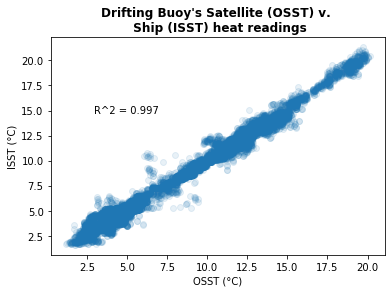

In [10]:
print(x_DB.shape)
print(y_DB.shape)
_ = plt.scatter(x_DB,y_DB,alpha=0.1)
_ = plt.xlabel('OSST (°C)')
_ = plt.ylabel('ISST (°C)')
_ = plt.title('Drifting Buoy\'s Satellite (OSST) v. \n Ship (ISST) heat readings',
             fontweight='bold')
lm = sm.OLS(y_DB,x_DB).fit()
_ = plt.text(5, 15, 'R^2 = ' + str(round(lm.rsquared,3)), horizontalalignment='center', 
             verticalalignment='center')


In [133]:
lm = sm.OLS(y_DB,x_DB).fit()

In [11]:
print("The Drifting Buoy's Rsquared values is " + str(lm.rsquared))

The Drifting Buoy's Rsquared values is 0.997114546636005


In [13]:
def makePlot(buoyStr,df):
    
    'Examine quality flags for ship data'
    HQ_flag = sum(df['ICflag']==1)
    total_flag = df['ICflag'].count()
    LQ_flag = total_flag - HQ_flag
    
    print('High quality flag percentage of '+ buoyStr + '\'s: ',
          round(100*(HQ_flag/total_flag),4),'%')
    
    z = df[['OSST','ISST']]
    z = z.dropna()
    
    x = np.array(z['OSST']) 
    y = np.array(z['ISST'])
    
    _ = plt.subplots()
    _ = plt.scatter(x, y, alpha=0.05,s=1)
    _ = plt.xlabel('OSST (°C)')
    _ = plt.ylabel('ISST (°C)')
    _ = plt.title('Satellite (OSST) v. '+ buoyStr +'\'s v. \n InSutu (ISST) heat readings',
                 fontweight='bold')
    lm = sm.OLS(y, x)
    lm_fit = lm.fit()
    lm = None
    _ = plt.text(5, 15, 'R^2 = ' + str(round(lm_fit.rsquared,3)), 
                 horizontalalignment='center', verticalalignment='center')
    plt.savefig(buoyStr)
    
    z = df[['LON','LAT']]
    z = z.dropna()
    
    x = np.array(z['LON']) 
    y = np.array(z['LAT'])
    
    x_DB=np.array(DB['LON']) 
    y_DB=np.array(DB['LAT'])

    ax = plt.axes(projection=ccrs.PlateCarree())
    plt.scatter(x,y)

    return

In [ ]:
for file in [DB,MB,SH]:
    if file is DB:
        buoyStr = 'Drifting Buoy 1995-2010'
    elif file is MB:
        buoyStr = 'Mooring Buoy 1991-1996'
    else:
        buoyStr = 'Ship 1991-2006'
    
    makePlot(buoyStr,file) 

High quality flag percentage of Drifting Buoy 1995-2010's:  97.628 %


In [13]:
x_MB=np.array(MB['OSST']) 
y_MB=np.array(MB['ISST'])

z_MB = MB[['OSST','ISST']]
print(z_MB.count(), 'max')
print('...')
z_MB = z_MB.dropna()
print(z_MB.count(), 'cleaned')
print('...')
print(z_MB)

OSST    9225
ISST    9226
dtype: int64 max
...
OSST    9225
ISST    9225
dtype: int64 cleaned
...
       OSST  ISST
0     10.83  10.6
1     10.83  10.6
2     10.83  10.6
3     10.37  10.7
4     10.37  10.6
5     10.37  10.6
6     10.27  10.4
7     10.27  10.3
8     10.24  10.1
9     10.05  10.0
10    10.05  10.0
11    10.05  10.0
12    10.34   9.9
13    10.34  10.0
14    10.34  10.0
15    10.43  10.0
16    10.43  10.0
17    10.43   9.9
18    10.43   9.9
19    10.45   9.9
20    10.45   9.8
21    10.39   9.8
22    10.39   9.7
23    10.39   9.7
24    10.39   9.7
25    10.39   9.7
26    10.42   9.7
27    10.46   9.7
28    10.46   9.7
29    10.46   9.7
...     ...   ...
9196  13.57  14.2
9197  13.57  14.2
9198  13.57  14.2
9199  13.57  14.1
9200  13.76  14.2
9201  13.76  14.2
9202  13.76  14.2
9203  13.76  14.2
9204  13.76  14.2
9205  13.76  14.2
9206  13.76  14.2
9207  13.76  14.3
9208  13.82  14.3
9209  13.82  14.3
9210  13.82  14.3
9211  13.82  14.3
9212  13.82  14.3
9213  13.82  14.3
92

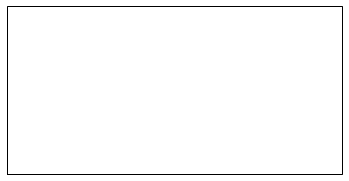

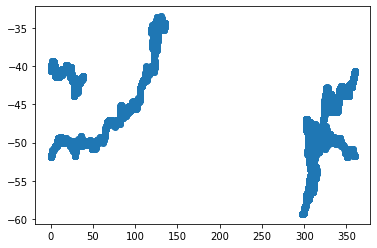